In [1]:
from extract_cnn_vgg16_keras import VGGNet
from keras.utils import plot_model

Using TensorFlow backend.
/home/cyj/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import argparse

In [3]:
index_dir="featureCNN.h5"
query_dir="test_image/82.png"
database_dir="database"

In [4]:
h5f = h5py.File(index_dir,'r')
feats = h5f['dataset_1'][:]
imgNames = h5f['dataset_2'][:]
h5f.close()

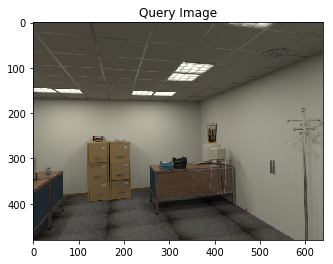

In [5]:
# read and show query image
queryImg = mpimg.imread(query_dir)
plt.title("Query Image")
plt.imshow(queryImg)
plt.show()

In [6]:
# init VGGNet16 model
model = VGGNet()

In [11]:
# extract query image's feature, compute simlarity score and sort
queryVec = model.extract_feat(query_dir)
scores = np.dot(queryVec, feats.T)
#print(queryVec)
print(len(queryVec))
print("------------")
print(len(feats.T))
print(len(feats.T[0]))
print(len(scores))
print("------------")
rank_ID = np.argsort(scores)[::-1]
rank_score = scores[rank_ID]
#print(rank_ID)
#print(len(rank_ID))
#print(rank_score)

feat_type= (1, 512)
512
------------
512
925
925
------------


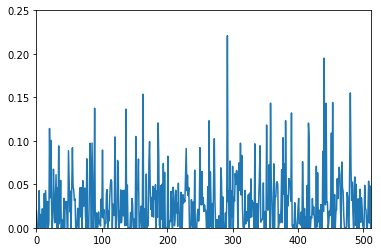

feat_type= (1, 512)


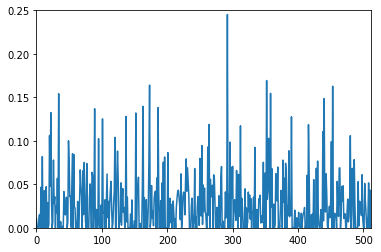

feat_type= (1, 512)


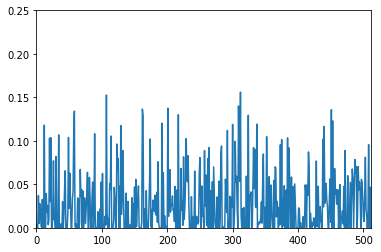

feat_type= (1, 512)


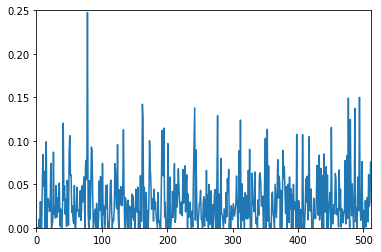

In [27]:
plt.xlim(0,512)
plt.ylim(0,0.25)
plt.plot(queryVec.flat)
plt.savefig('/home/cyj/Pictures/feature1.png',dpi=900)
plt.show()

queryVec1 = model.extract_feat("database/66.png")
plt.xlim(0,512)
plt.ylim(0,0.25)
plt.plot(queryVec1.flat)
plt.savefig('/home/cyj/Pictures/feature2.png',dpi=900)
plt.show()
'''
queryVec2 = model.extract_feat("database/91.png")
plt.plot(queryVec2.flat)
plt.show()

queryVec3 = model.extract_feat("database/1.png")
plt.plot(queryVec3.flat)
plt.show()
'''
queryVec4 = model.extract_feat("database/539.png")
plt.xlim(0,512)
plt.ylim(0,0.25)
plt.plot(queryVec4.flat)
plt.savefig('/home/cyj/Pictures/feature3.png',dpi=900)
plt.show()

queryVec5 = model.extract_feat("database/1305032391.330276.png")
plt.xlim(0,512)
plt.ylim(0,0.25)
plt.plot(queryVec5.flat)
plt.savefig('/home/cyj/Pictures/feature4.png',dpi=900)
plt.show()

In [15]:
# number of top retrieved images to show
maxres = 3
imlist = [imgNames[index] for i,index in enumerate(rank_ID[0:maxres])]
print("--------------------------------------------------")
print("top %d images in order are: " %maxres, imlist)
print("--------------------------------------------------")

--------------------------------------------------
top 3 images in order are:  [b'66.png', b'91.png', b'1.png']
--------------------------------------------------


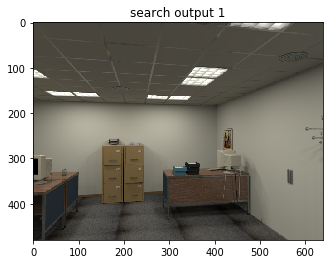

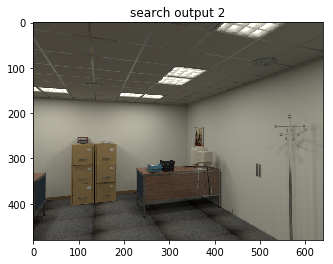

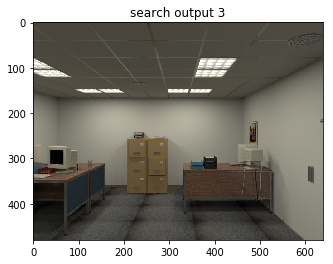

In [16]:
# show top #maxres retrieved result one by one
for i,im in enumerate(imlist):
    image = mpimg.imread(str(database_dir+"/"+str(im, encoding = "utf-8")))
    plt.title("search output %d" %(i+1))
    plt.imshow(image)
    plt.show()